<a href="https://colab.research.google.com/github/ElliotSiegel/Data201/blob/main/Data201_Project2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of Diabetes Hospital Readmission in the United States through Decision Tree
What factors collected from the United States' Hosiptals will help predict diabetes readmission.

* With the selected features, the decision tree composed will predict the diabetes early readmission rate in the United States. Defined as within a month

#Dataset
* Center for Clinical and Translational Research, Virginia Commonwealth University https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

* Discovered through https://www.kaggle.com/brandao/diabetes?select=diabetic_data.csv

* 1)	It is an inpatient encounter (a hospital admission).
* (2)	It is a “diabetic” encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
* (3)	The length of stay was at least 1 day and at most 14 days.
* (4)	Laboratory tests were performed during the encounter.
* (5)	Medications were administered during the encounter.

Data Was taken from 130 hospitals
* 18 Midwest
* 58 Northeast 
* 28 South
* 16 West

Note that a portion of hospitals were labeled as having a bed size of less than 100. And 14 hospitals had a bedsize > 500

## Details
The Data consists of around 101,766 rows - one row per encounter ID - and 50 columns.

#### encounter_ID
* An unique identification number at the time a patient's appointment is scheduled.

#### patient_nbr
* An unique number of a patient

#### race
* Patient's race is Caucasian, Asian, African American, Hispanic, and other

#### gender
* Patient's gender male, female, and unknown/invalid

#### age
* Patient' age grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

#### weight
* Weight of patient (lBs).

#### admission_type_id
* An ID corresponding with 4 distint cirumstance a patient was admitted.

#### discharge_disposition_id
* A two-digit ID that corresponds with 28 distint values of a patient's discharge status.

### admission_source_id
* The code indicating the source of the referral for the admission or visit.
* https://resdac.org/cms-data/variables/claim-source-inpatient-admission-code-ffs

### time_in_hospital
* Number of days patient spend in the hospital between admission and discharge

### payer_code
* A code that is assiged to an insurance company for the purpose of transmitting your claims electronically.

### medical_specialty
* Specialize medical practice 

### num_lab_procedures
* Number of lab procedures

### num_procedures
* Number of procedures

### num_medications
* Number of medications.

### number_outpatient
* Number of outpatients

### number_emergency
* Number of emergencies 

### number_inpatient
* Number of inpatients

### diag_1
* The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

### diag_2
* Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

### diag_3
* Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

### number_diagnoses
* Number of diagnoses

### max_glu_serum
* Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

### A1Credult
* Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* This is a very important measure of glucose control - and used to help measure the preformance of diabetes control.  

### Medications
* 23 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone

### change  
* Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

### diabetesMed
* Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

### readmitted
* No readmission
* A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate)
* A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
import xgboost as xgb
import warnings
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action="ignore", category=FutureWarning)

#read dataset in from file
df = pd.read_csv('/content/diabetic_data.csv')

%load_ext google.colab.data_table

df.head()

#df_carbon = df.copy(deep=True) 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#EDA

In [ ]:
#Get some base info on our dataset
o_rowcount = df.shape[0]
o_featurecount = df.shape[1] 
o_dtypes = df.dtypes

print("Row Count: " + str(o_rowcount))
print("Feature Count: " + str(o_featurecount))
print("-------------------------------------")
print("Datatypes:")
o_dtypes

Row Count: 101766
Feature Count: 50
-------------------------------------
Datatypes:


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
#exploring unique values in each column
for col in df.columns:
    print("                   ")
    print(col, df[col].unique())

                   
encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
                   
patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
                   
race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
                   
gender ['Female' 'Male' 'Unknown/Invalid']
                   
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
                   
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
                   
admission_type_id [6 1 2 3 4 5 8 7]
                   
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
                   
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
                   
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
                   
payer_code ['?' 'MC'

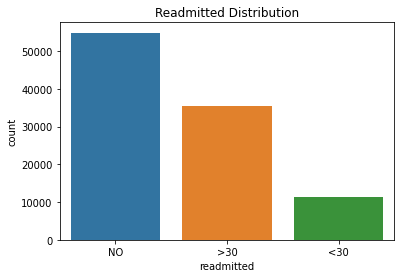

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


In [ ]:
sns.countplot(df['readmitted'])
plt.title("Readmitted Distribution")
plt.show()

print(df.readmitted.value_counts())

Data Investivation

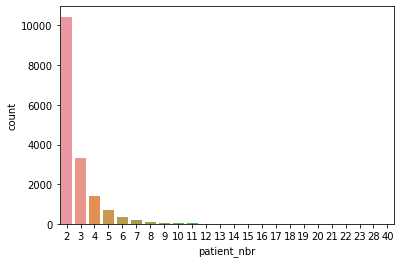

In [ ]:
sns.countplot(df['patient_nbr'].value_counts().loc[lambda x : x>1])
plt.show()

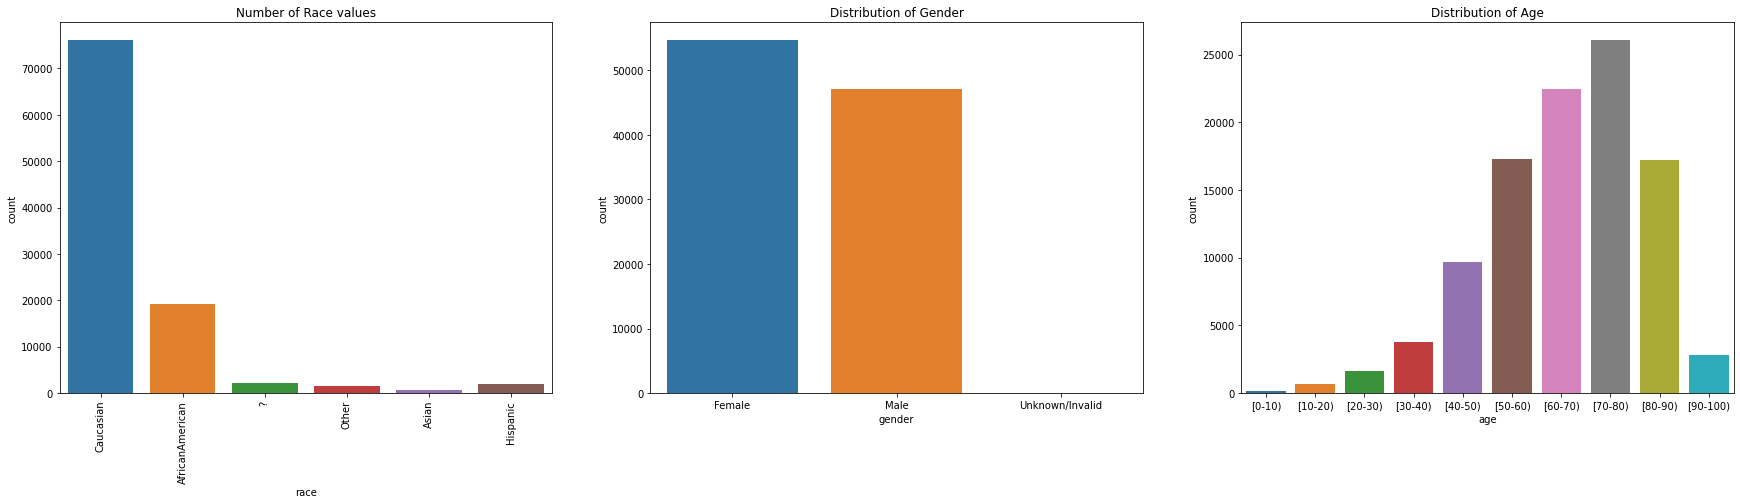

Proportion of Race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Proportion of Gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Proportion of Age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,3,1)
sns.countplot(df['race'])
plt.xticks(rotation=90)
plt.title("Number of Race values")

plt.subplot(2,3,2)
sns.countplot(df['gender'])
plt.title("Distribution of Gender")

plt.subplot(2,3,3)
sns.countplot(df['age'])
plt.title("Distribution of Age")
plt.show()

print("Proportion of Race")
print(df.race.value_counts())
print()
print("Proportion of Gender")
print(df.gender.value_counts())
print()
print("Proportion of Age")
print(df.age.value_counts())

In [ ]:
print(df.weight.value_counts())

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


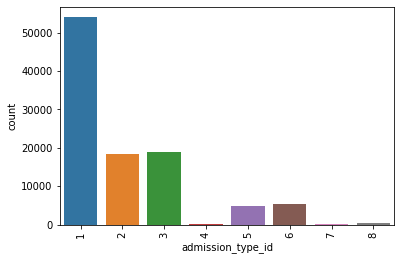

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


In [ ]:
sns.countplot(data = df, x = "admission_type_id")
plt.xticks(rotation=90)
plt.show()
print(df.admission_type_id.value_counts())

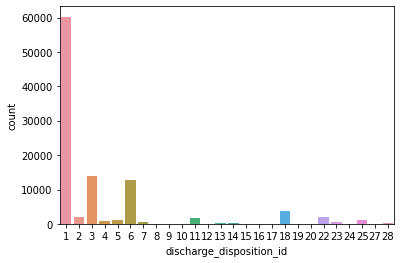

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


In [ ]:
#Potential noise -- Dist Chart

sns.countplot(data = df, x = "discharge_disposition_id")
plt.show()
print(df.discharge_disposition_id.value_counts())

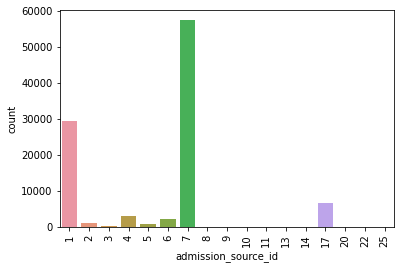

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64


In [ ]:
#Same for Admission source - just a dist chart

sns.countplot(data = df, x = "admission_source_id")
plt.xticks(rotation=90)
plt.show()
print(df.admission_source_id.value_counts())


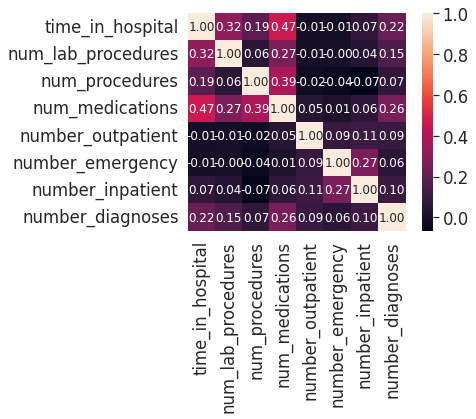

In [ ]:
corr_coef = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].corr()

sns.set(font_scale=1.5)
heat_map = sns.heatmap(corr_coef,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':12})

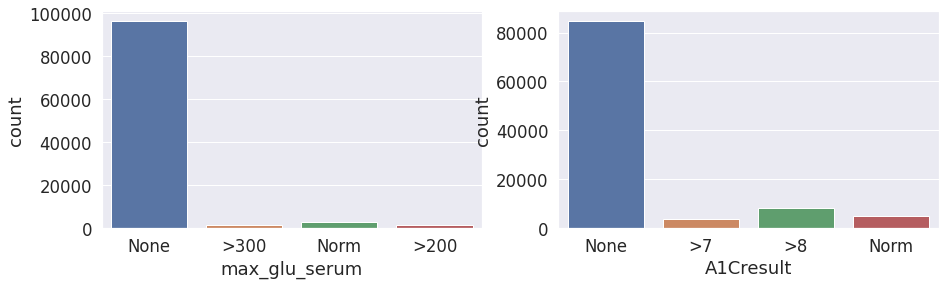

Proportion of max_glu_serum
None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

Proportion of A1Cresult
None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64


In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(df['max_glu_serum'])

plt.subplot(1,2,2)
sns.countplot(df['A1Cresult'])
plt.show()

print("Proportion of max_glu_serum")
print(df.max_glu_serum.value_counts())
print()
print("Proportion of A1Cresult")
print(df.A1Cresult.value_counts())

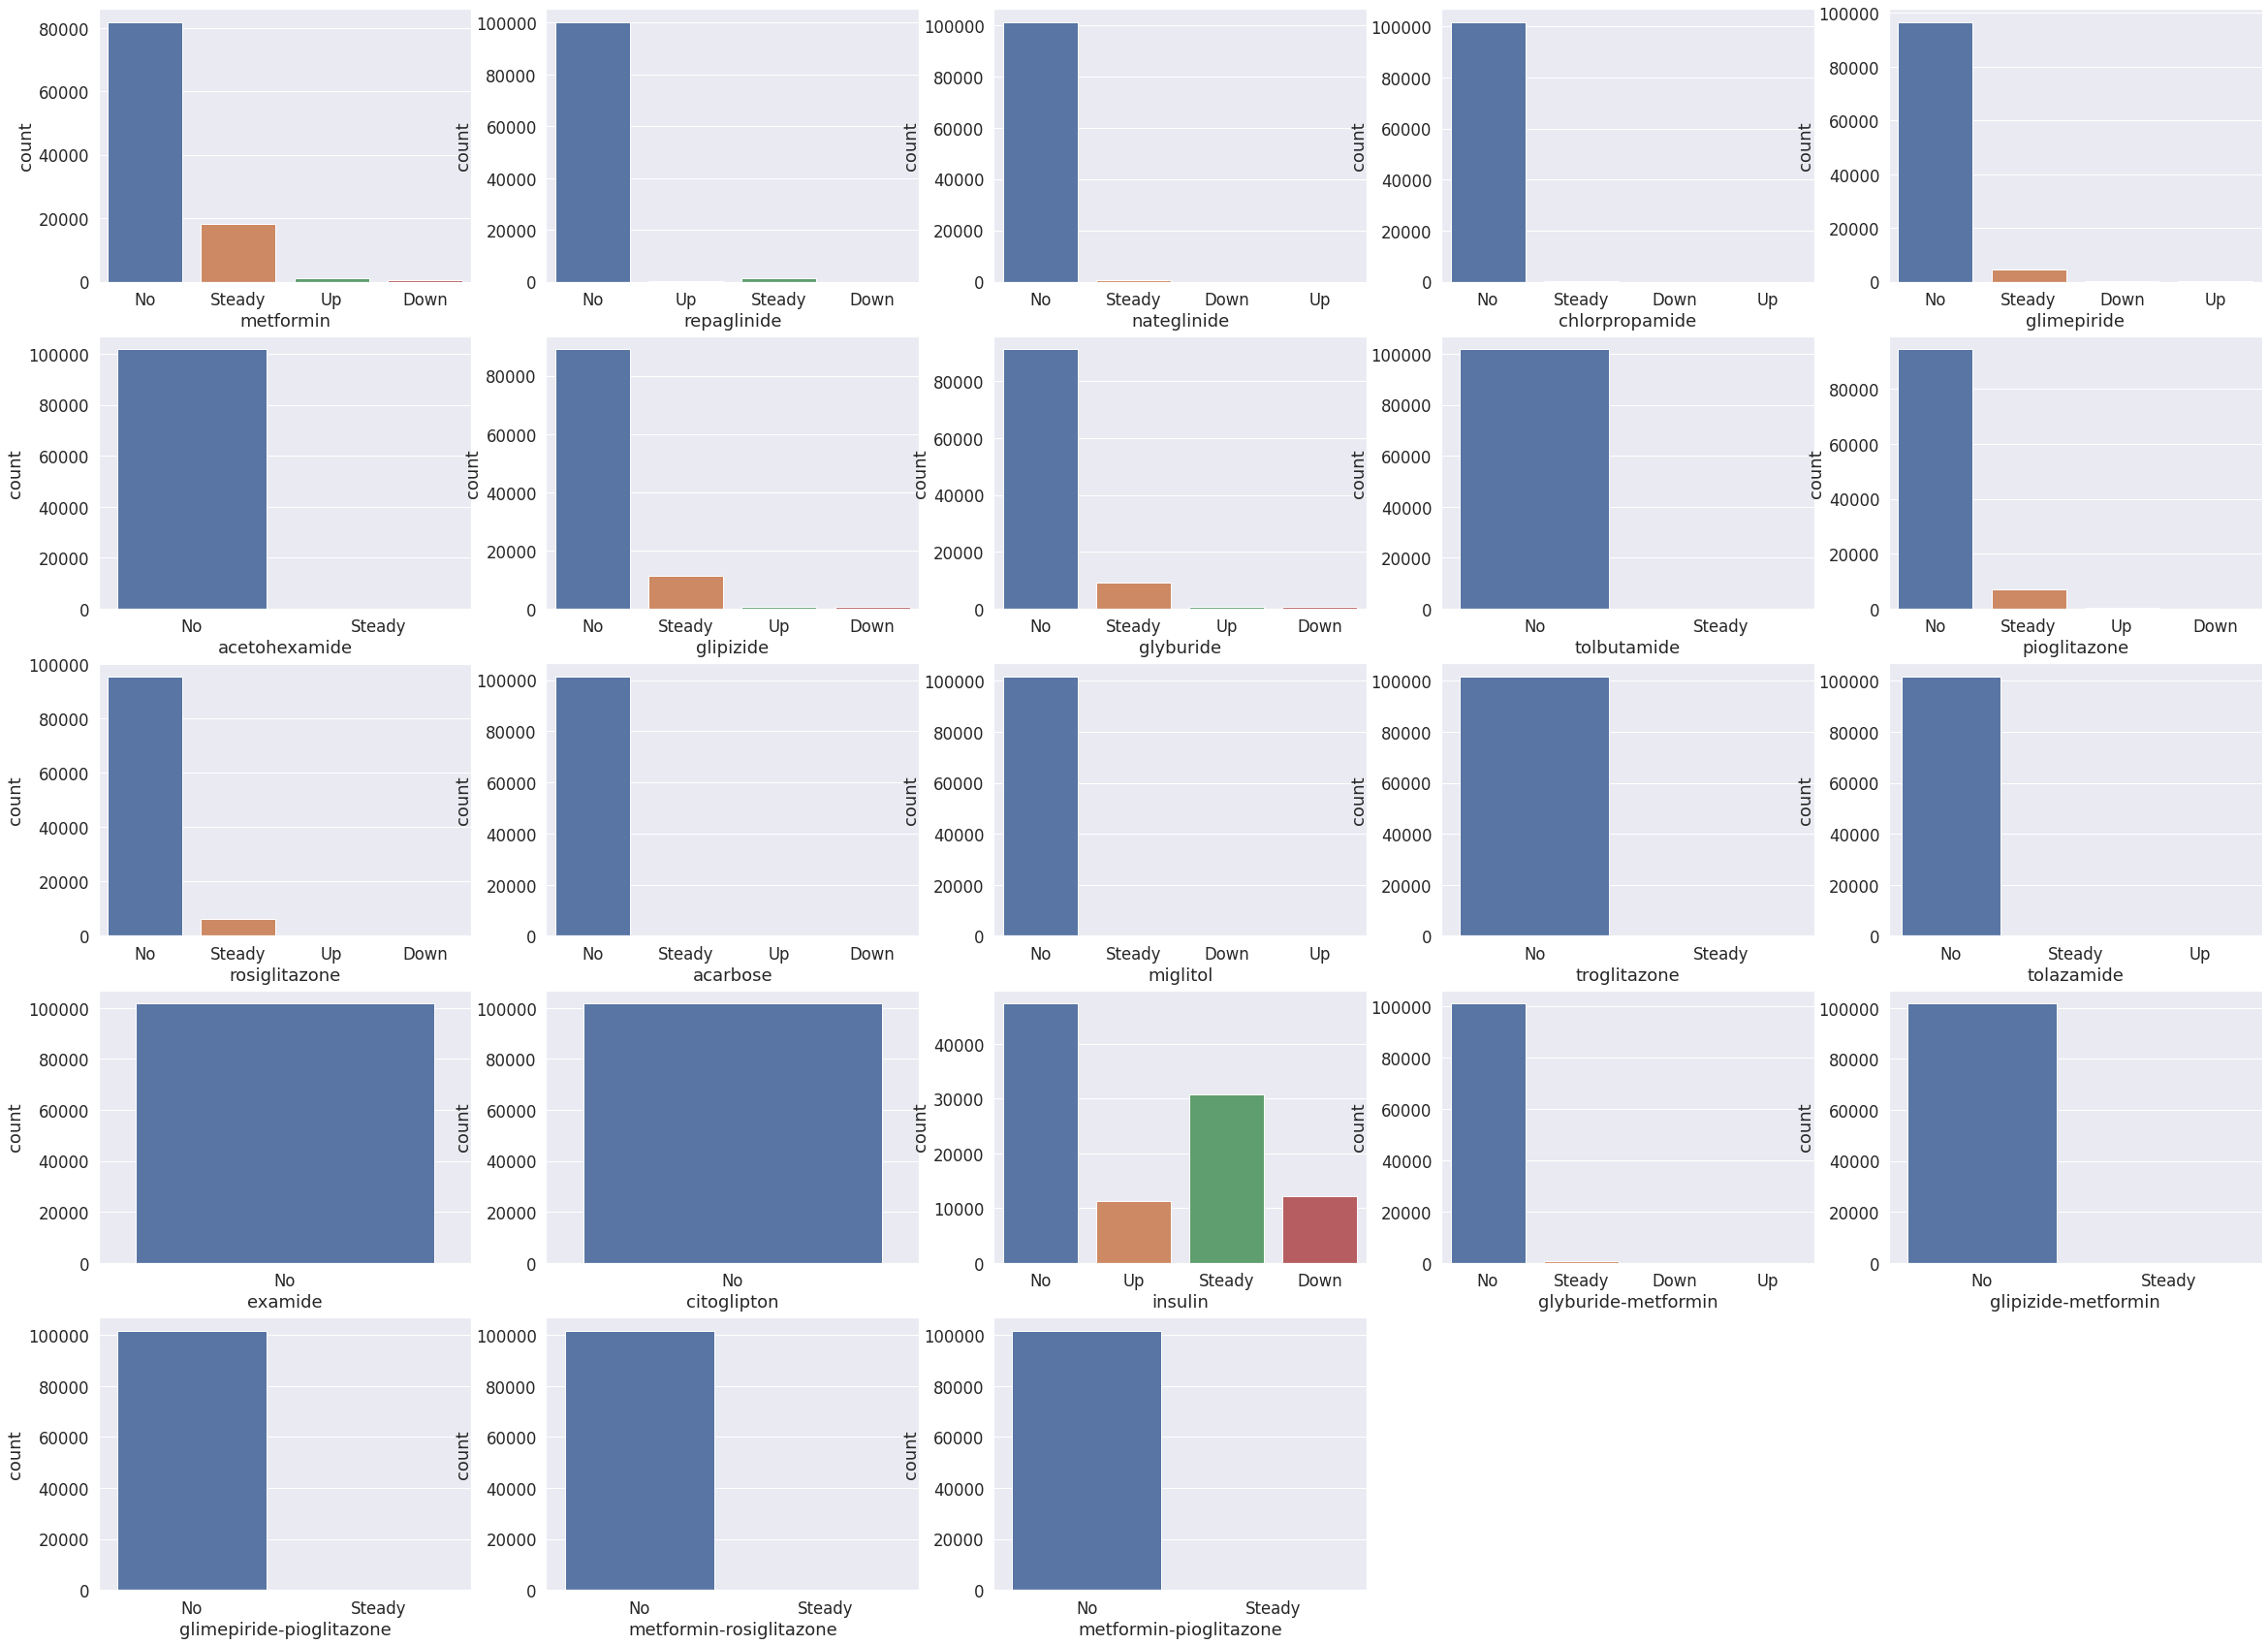

In [ ]:


medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 
               'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
               'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']   

plt.figure(figsize=(40,30))
for i in enumerate(medications):
  plt.subplot(5, 5,i[0]+1)
  sns.countplot(df[i[1]])

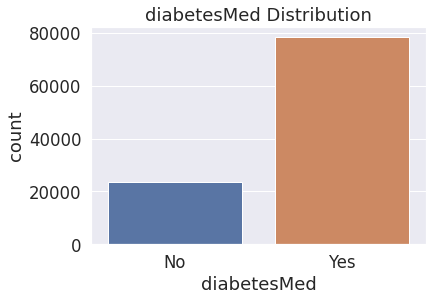

Proportion of diabetesMed
Yes    78363
No     23403
Name: diabetesMed, dtype: int64


In [ ]:
sns.countplot(df['diabetesMed'])
plt.title("diabetesMed Distribution")
plt.show()

print("Proportion of diabetesMed")
print(df.diabetesMed.value_counts())

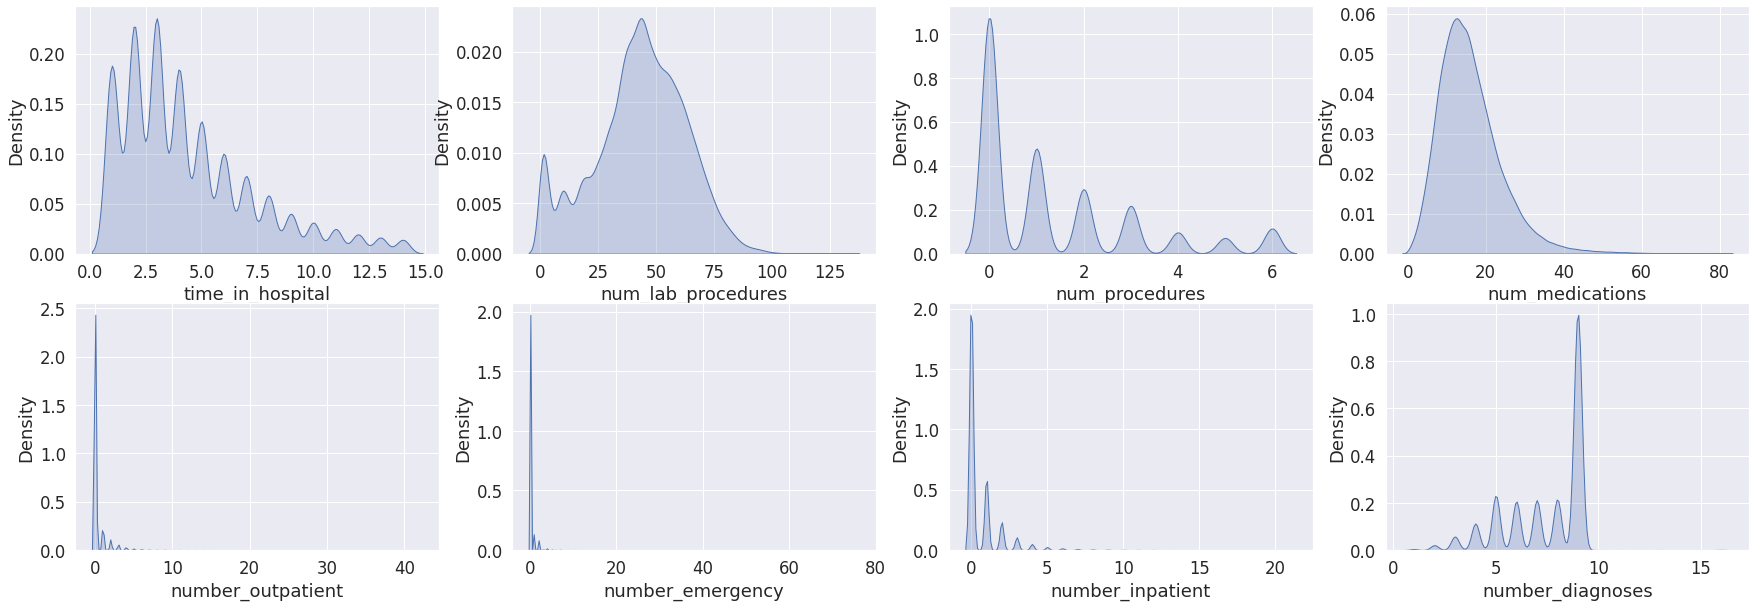

In [ ]:
fig,ax=plt.subplots(2,4,figsize=(30,10))
ax=ax.flatten()
j=0
for i in corr_coef:    
    sns.kdeplot(df[i],ax=ax[j],shade=True)
    plt.rc('legend', fontsize=15) 
    j=j+1
plt.show()

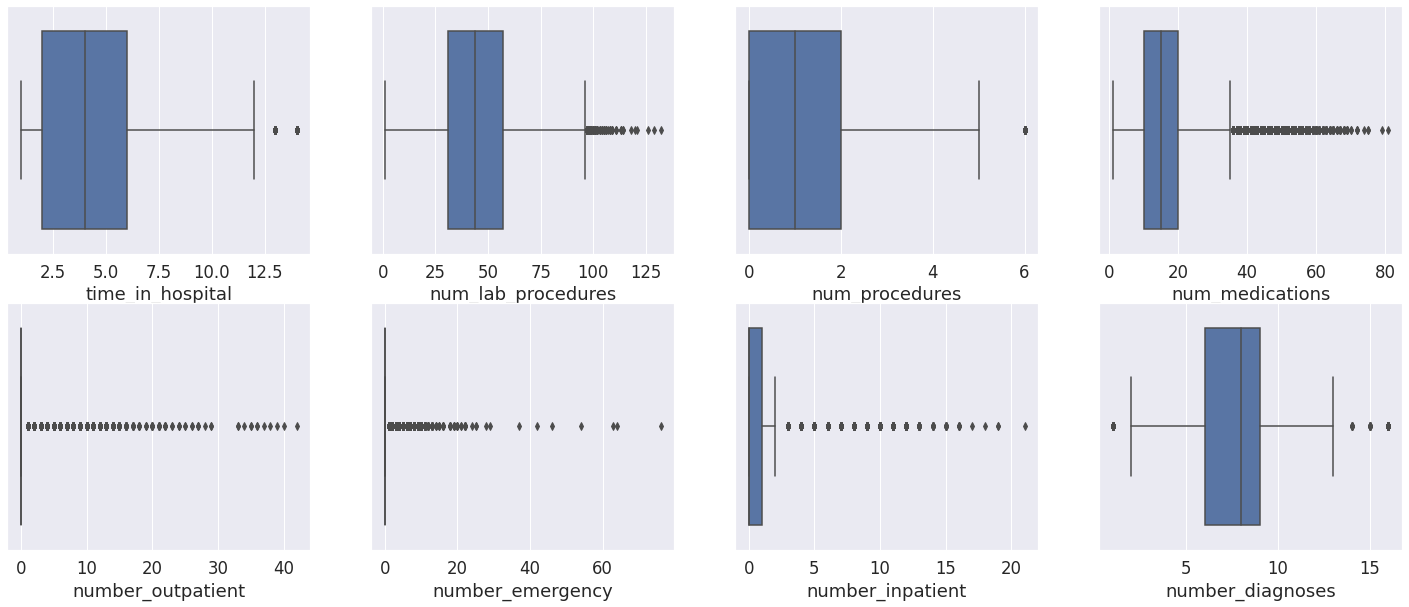

In [ ]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
ax=ax.flatten()
j=0
for i in corr_coef:    
    sns.boxplot(df[i],ax=ax[j]) 
    j=j+1
plt.show()

#PreProcessing


Col counter for value: ?
----------------------------------------
object - race: 2273 out of 101766 totaling 0.02%
object - weight: 98569 out of 101766 totaling 0.97%
object - payer_code: 40256 out of 101766 totaling 0.4%
object - medical_specialty: 49949 out of 101766 totaling 0.49%
object - diag_1: 21 out of 101766 totaling 0.0%
object - diag_2: 358 out of 101766 totaling 0.0%
object - diag_3: 1423 out of 101766 totaling 0.01%


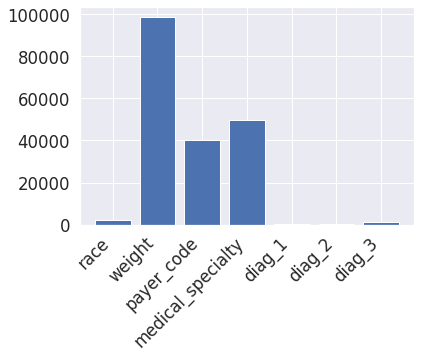

In [ ]:
"Lets take a look at those question marks"

df.stack().value_counts()

def check_fillers(col_check, value_check):
  return df[df[col_check] == value_check].shape[0]


def col_value_checker(df, value_check):
  print('Col counter for value: ' + str(value_check))
  print('----------------------------------------')
  temp_dict = {}
  for col in df.columns:
      value_counter = check_fillers(col,value_check)
      if value_counter != 0:
        temp_dict[col] = value_counter
        print(str(df[col].dtype) + " - " + col + ": " + str(value_counter) + " out of " + str(df[col].count()) + " totaling " + str(round(value_counter/df[col].count(), 2)) + "%")
  keys = temp_dict.keys()
  values = temp_dict.values()
  plt.bar(keys, values)
  plt.xticks(rotation=45, ha='right')


col_value_checker(df, '?')



In [ ]:

#drop cols which are greater than 40% ?
df = df.drop('weight', 1)
df = df.drop('payer_code', 1)
df = df.drop('medical_specialty', 1)

#Convert "?" to NaN for less than 40%
df['diag_1'] = df['diag_1'].replace(['?'],np.nan)
df['diag_2'] = df['diag_2'].replace(['?'],np.nan)
df['diag_3'] = df['diag_3'].replace(['?'],np.nan)


In [ ]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-rosiglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide']

In [ ]:
for col in meds:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

df['numchange'] = 0

for col in meds:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    

In [ ]:
df['numchange'].value_counts()

0    74063
1    26272
2     1318
3      108
4        5
Name: numchange, dtype: int64

In [ ]:
#lets now look for features with one value & features with two values but almoast all go into one of the two.

for col in df.columns:
  temp_df = df[col].value_counts().to_frame()
  if temp_df.shape[0] == 2:
      if (temp_df[col] == 1).any():
          print("                                     ")
          print("                                     ")
          print("-------------------------------------")
          print("DROPPING ")
          print(temp_df)
          df = df.drop(col, 1)
  elif temp_df.shape[0] == 1:
      print("                                     ")
      print("                                     ")
      print("-------------------------------------")
      print("DROPPING ")
      print(temp_df)
      df = df.drop(col, 1)


#Lets also drop encounter ID as its just an ID field
df = df.drop('encounter_id', 1)
df.to_csv('out.csv', index=False)

                                     
                                     
-------------------------------------
DROPPING 
        acetohexamide
No             101765
Steady              1
                                     
                                     
-------------------------------------
DROPPING 
    examide
No   101766
                                     
                                     
-------------------------------------
DROPPING 
    citoglipton
No       101766
                                     
                                     
-------------------------------------
DROPPING 
        glimepiride-pioglitazone
No                        101765
Steady                         1
                                     
                                     
-------------------------------------
DROPPING 
        metformin-pioglitazone
No                      101765
Steady                       1


In [ ]:
#Drop repeat patient entries  --> Need visual w/EDA
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df.shape

(71518, 42)

In [ ]:
#Lets see how it cleaned up
print("Original Row count: " + str(o_rowcount) + " vs new row count " + str(df.shape[0]))
print("Original Feature count: " + str(o_featurecount) + " vs new feature count " + str(df.shape[1]))


Original Row count: 101766 vs new row count 71518
Original Feature count: 50 vs new feature count 42


Light Feature engineering

In [ ]:
#New features of total admissions
df['total_admission'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Feature Encoding

In [ ]:
#Now for datatype encoding
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','metformin-rosiglitazone','tolazamide','glyburide-metformin','glipizide-metformin']
#'metformin-rosiglitazone'

#Med Codes Mapping
for med_column in med_columns:
  df[med_column] = df[med_column].map({'No':0, 'Up':1, 'Down':2, 'Steady':3})

#set readmitted status to codes -- Anything greater than 30 days set to 0. Since were only looking at a month
df['readmitted'] = df['readmitted'].map({'NO':0, '>30':0, '<30':1})

#set diabetes to codes
df['diabetesMed'] = df['diabetesMed'].map({'No':0, 'Yes':1})

df['A1Cresult'] = df['A1Cresult'].map({'None':2, 'Norm':0, '>7':1,'>8':1})

df['max_glu_serum'] = df['max_glu_serum'].map({'>200':1, '>300':1, 'Norm':0,'None':2})

#Some cols to catagories
df['race'] = df['race'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['age'] = df['age'].astype('category').cat.codes
df['change'] = df['change'].astype('category').cat.codes

df['insulin'] = df['insulin'].astype('category').cat.codes

print(df.dtypes)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


patient_nbr                  int64
race                          int8
gender                        int8
age                           int8
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone        

In [ ]:

df['diag_1'] = df['diag_1'].astype('category').cat.codes
df['diag_2'] = df['diag_2'].astype('category').cat.codes
df['diag_3'] = df['diag_3'].astype('category').cat.codes


In [ ]:
#Null entry checks

"lets grab the null entries and see if theres any pattern"
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN.shape)
rows_with_NaN.info()


df.to_csv('out.csv', index=False)

(0, 43)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   patient_nbr               0 non-null      int64
 1   race                      0 non-null      int8 
 2   gender                    0 non-null      int8 
 3   age                       0 non-null      int8 
 4   admission_type_id         0 non-null      int64
 5   discharge_disposition_id  0 non-null      int64
 6   admission_source_id       0 non-null      int64
 7   time_in_hospital          0 non-null      int64
 8   num_lab_procedures        0 non-null      int64
 9   num_procedures            0 non-null      int64
 10  num_medications           0 non-null      int64
 11  number_outpatient         0 non-null      int64
 12  number_emergency          0 non-null      int64
 13  number_inpatient          0 non-null      int64
 14  diag_1                    0 non-null      int1

#Decision Tree

In [ ]:
#Set Decison tree
feature_cols = df.columns.values.tolist()
feature_cols.remove('readmitted')

print(feature_cols)

X = df[feature_cols] # Features
y = df.readmitted # Target variable

# Split dataset into training set and test set 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(max_depth=2, random_state=1)



['patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'change', 'diabetesMed', 'numchange', 'total_admission']


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evalign the Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8311894108873975


In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.912798


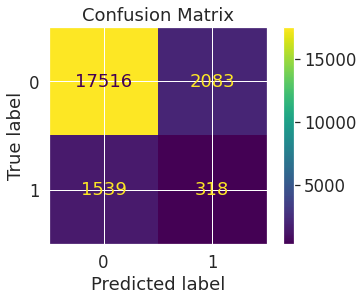

In [ ]:
confusion_matrix = plot_confusion_matrix(clf, X_test, y_test, normalize=None)

plt.title('Confusion Matrix')
plt.show(confusion_matrix)

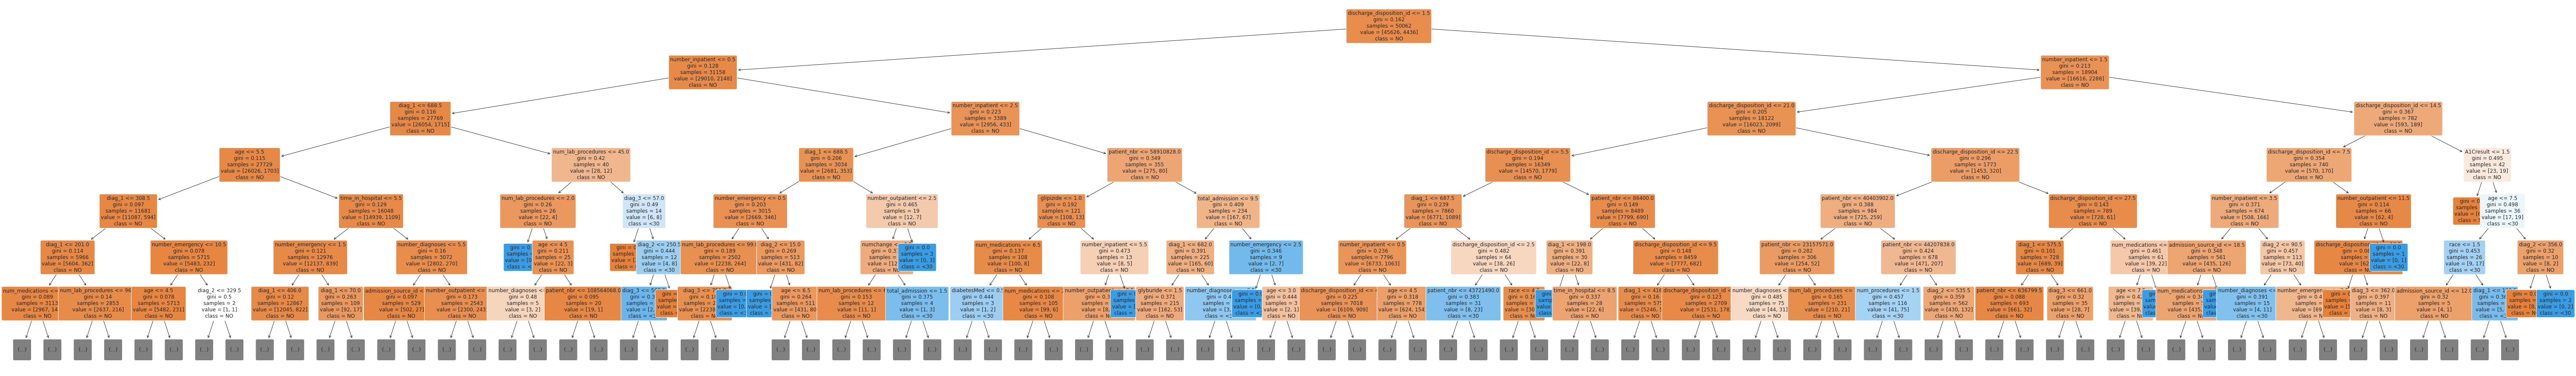

In [ ]:
# Plotting Decision Tree
fig, ax = plt.subplots(figsize=(108,16), nrows = 1,ncols = 1) #dpi=300)

tree.plot_tree(decision_tree=clf, filled = True, max_depth=6, fontsize=12, feature_names=feature_cols, class_names=['NO', '<30'], rounded = True );
# Graph key:'NO'-> no readmission   '<30'-> readmission in less than 30 days


# Results
TPR = 0.91954745

TNR = 0.13578680

PPV = 0.89575999

NPV = 0.17285945

FPR = 0.86421320

FNR = 0.08045254

FDR = 0.10424001

ACC = 0.83319351

In [ ]:
def get_clf_graph(clf):
    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(decision_tree=clf, filled = True, max_depth=4, fontsize=12, feature_names=feature_cols, class_names=['NO', '<30'], rounded = True );

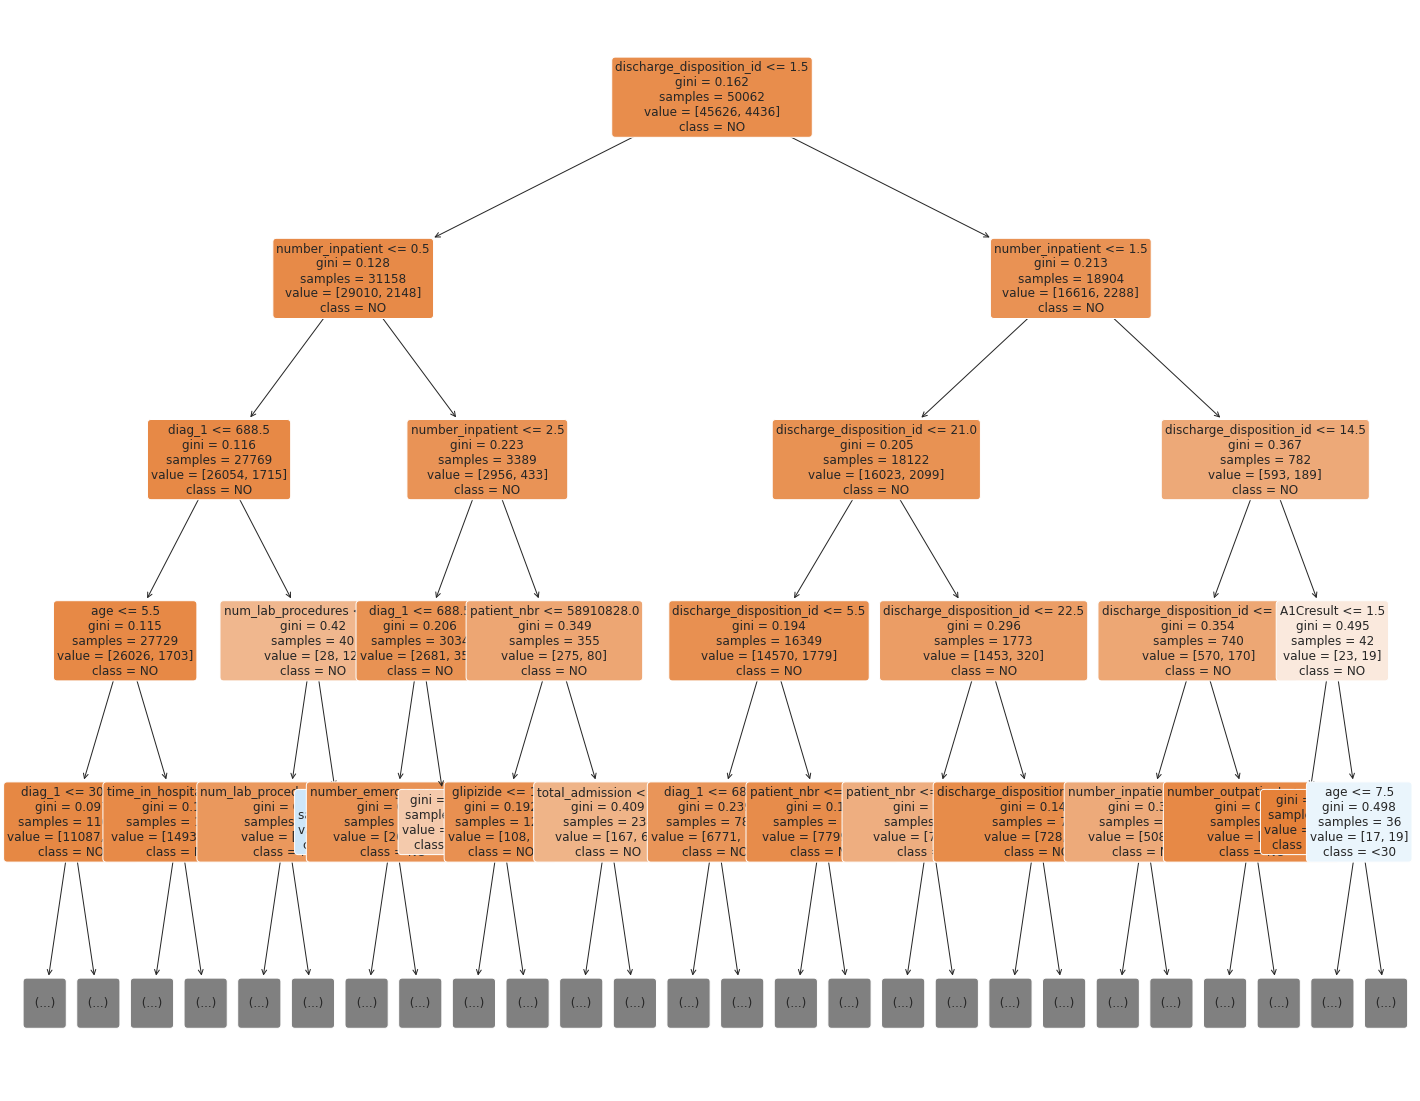

In [ ]:
clf_min = DecisionTreeClassifier(min_samples_split=20)
clf_min.fit(X_train, y_train)

gph = get_clf_graph(clf_min)

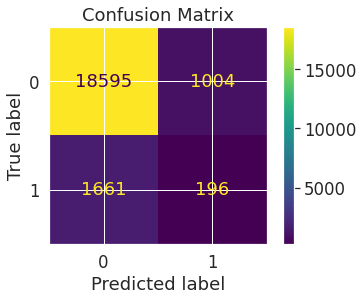

In [ ]:
confusion_matrix = plot_confusion_matrix(clf_min, X_test, y_test, normalize=None)

plt.title('Confusion Matrix')
plt.show(confusion_matrix)


TPR = 0.91792998

TNR = 0.16182573

PPV = 0.94846676

NPV = 0.10500807

FPR = 0.83817427

FNR = 0.08207002

FDR = 0.05153324

ACC = 0.87546607

In [ ]:
clf_min_entropy = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)
clf_min_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)

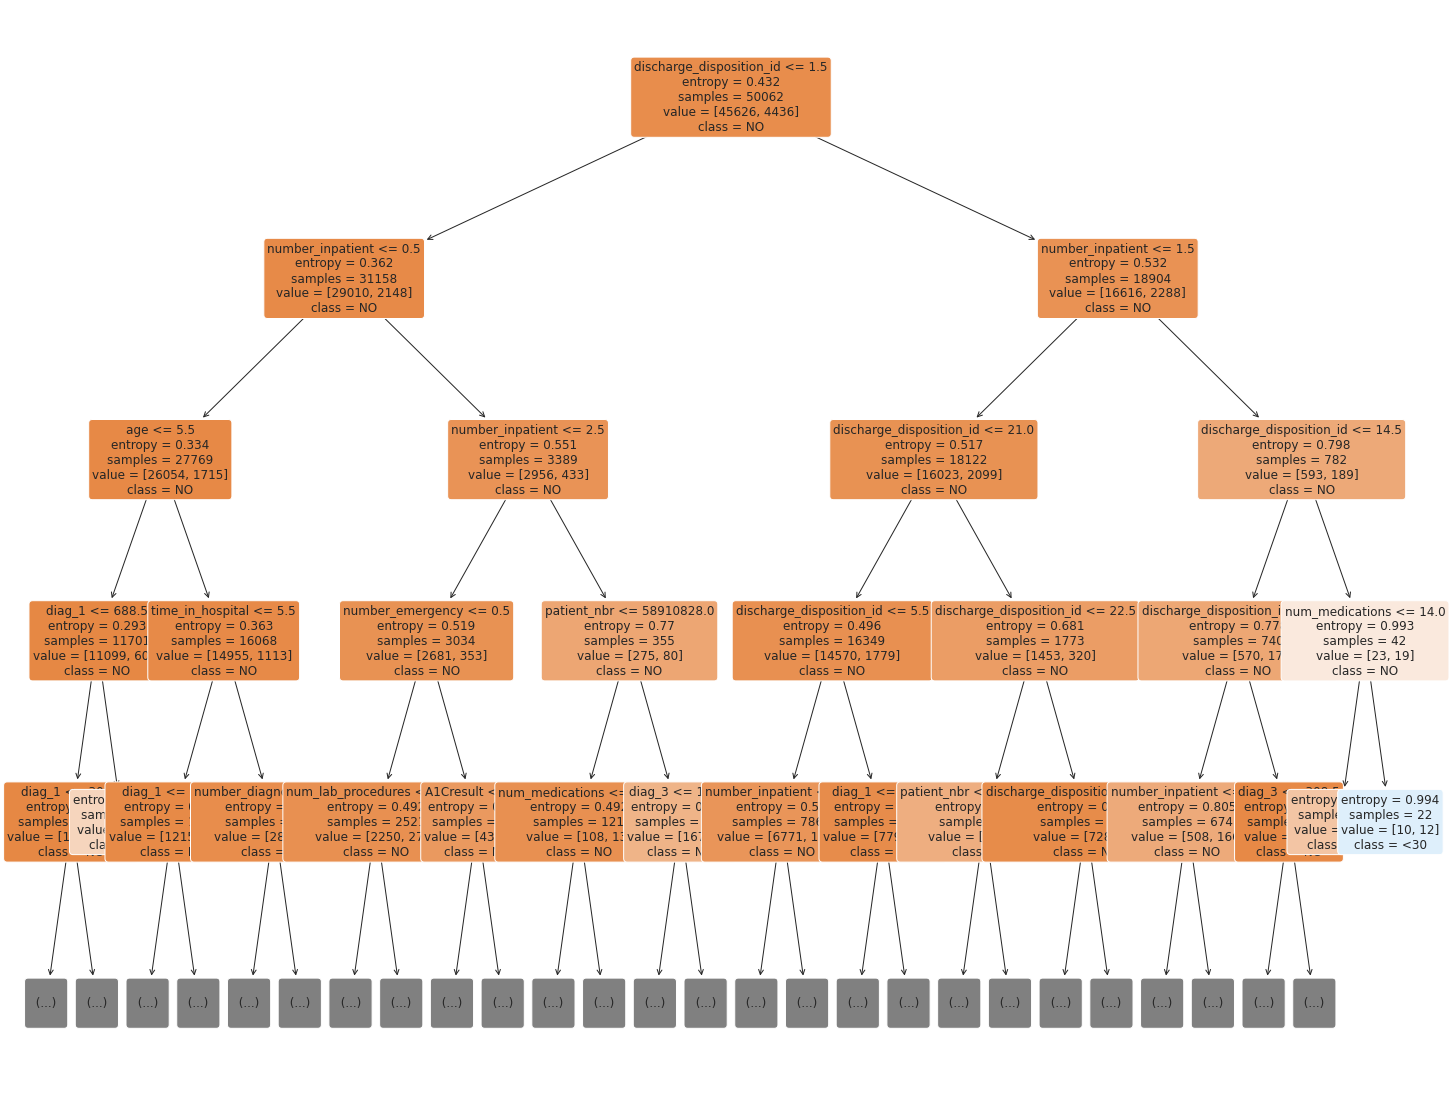

In [ ]:
gph = get_clf_graph(clf_min_entropy)

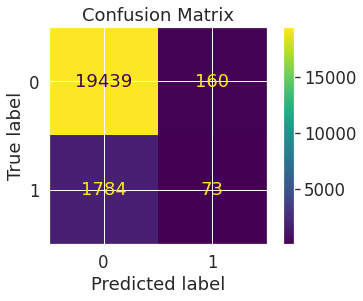

In [ ]:
confusion_matrix = plot_confusion_matrix(clf_min_entropy, X_test, y_test, normalize=None)

plt.title('Confusion Matrix')
plt.show(confusion_matrix)

TPR = 0.91594025

TNR = 0.31330472

PPV = 0.99183632

NPV = 0.03931072

FPR = 0.68669527

FNR = 0.08405975

FDR = 0.00816368

ACC = 0.90939597

------------------------------------